# Model Training and Evaluation
## Classification Models

This notebook implements and evaluates 6 classification models:
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor (kNN)
4. Naive Bayes
5. Random Forest (Ensemble)
6. XGBoost (Ensemble)

For each model, we calculate:
- Accuracy
- AUC Score
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preprocessing and Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Step 1: Load Training and Test Data

In [3]:
# Load the preprocessed data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())

Training set: 32950 samples, 20 features
Test set: 8238 samples

Class distribution in training set:
0    29238
1     3712
Name: count, dtype: int64


## Step 2: Data Preprocessing - Feature Scaling

Some models (Logistic Regression, kNN) benefit from feature scaling.

In [4]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for later use in Streamlit app
with open('../model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Feature scaling completed")
print(f"Scaled training data shape: {X_train_scaled.shape}")

✅ Feature scaling completed
Scaled training data shape: (32950, 20)


## Step 3: Define Evaluation Function

This function calculates all required metrics for any model.

In [5]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate a classification model and return all required metrics.
    
    Parameters:
    - model: Trained model
    - X_test: Test features
    - y_test: Test labels
    - model_name: Name of the model (for display)
    
    Returns:
    - Dictionary with all metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get probability predictions for AUC
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function
        y_pred_proba = model.decision_function(X_test)
    
    # Calculate all metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1': f1_score(y_test, y_pred, average='binary'),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"  {model_name}")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:12s}: {value:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return metrics, y_pred, cm

## Step 4: Train and Evaluate All Models

### Model 1: Logistic Regression

In [6]:
# Train Logistic Regression (uses scaled data)
print("🔄 Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Evaluate
lr_metrics, lr_pred, lr_cm = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")

# Save model
with open('../model/logistic_regression.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

print("\n✅ Logistic Regression model saved!")

🔄 Training Logistic Regression...

  Logistic Regression
Accuracy    : 0.9139
AUC         : 0.9370
Precision   : 0.7002
Recall      : 0.4127
F1          : 0.5193
MCC         : 0.4956

Confusion Matrix:
[[7146  164]
 [ 545  383]]

✅ Logistic Regression model saved!


### Model 2: Decision Tree Classifier

In [7]:
# Train Decision Tree (uses original data)
print("🔄 Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20)
dt_model.fit(X_train, y_train)

# Evaluate
dt_metrics, dt_pred, dt_cm = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Save model
with open('../model/decision_tree.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

print("\n✅ Decision Tree model saved!")

🔄 Training Decision Tree Classifier...

  Decision Tree
Accuracy    : 0.9161
AUC         : 0.9213
Precision   : 0.6357
Recall      : 0.5981
F1          : 0.6163
MCC         : 0.5696

Confusion Matrix:
[[6992  318]
 [ 373  555]]

✅ Decision Tree model saved!


### Model 3: K-Nearest Neighbors (kNN)

In [8]:
# Train kNN (uses scaled data)
print("🔄 Training K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate
knn_metrics, knn_pred, knn_cm = evaluate_model(knn_model, X_test_scaled, y_test, "kNN")

# Save model
with open('../model/knn.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

print("\n✅ kNN model saved!")

🔄 Training K-Nearest Neighbors...

  kNN
Accuracy    : 0.9053
AUC         : 0.8617
Precision   : 0.6267
Recall      : 0.3944
F1          : 0.4841
MCC         : 0.4491

Confusion Matrix:
[[7092  218]
 [ 562  366]]

✅ kNN model saved!


### Model 4: Naive Bayes (Gaussian)

In [9]:
# Train Naive Bayes (uses scaled data for better performance)
print("🔄 Training Naive Bayes...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate
nb_metrics, nb_pred, nb_cm = evaluate_model(nb_model, X_test_scaled, y_test, "Naive Bayes")

# Save model
with open('../model/naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

print("\n✅ Naive Bayes model saved!")

🔄 Training Naive Bayes...

  Naive Bayes
Accuracy    : 0.8536
AUC         : 0.8606
Precision   : 0.4024
Recall      : 0.6175
F1          : 0.4872
MCC         : 0.4189

Confusion Matrix:
[[6459  851]
 [ 355  573]]

✅ Naive Bayes model saved!


### Model 5: Random Forest (Ensemble)

In [10]:
# Train Random Forest (uses original data)
print("🔄 Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)

# Evaluate
rf_metrics, rf_pred, rf_cm = evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Save model
with open('../model/random_forest.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("\n✅ Random Forest model saved!")

🔄 Training Random Forest...

  Random Forest
Accuracy    : 0.9221
AUC         : 0.9527
Precision   : 0.7043
Recall      : 0.5312
F1          : 0.6057
MCC         : 0.5703

Confusion Matrix:
[[7103  207]
 [ 435  493]]

✅ Random Forest model saved!


### Model 6: XGBoost (Ensemble)

In [11]:
# Train XGBoost (uses original data)
print("🔄 Training XGBoost...")
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Evaluate
xgb_metrics, xgb_pred, xgb_cm = evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Save model
with open('../model/xgboost.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("\n✅ XGBoost model saved!")

🔄 Training XGBoost...

  XGBoost
Accuracy    : 0.9219
AUC         : 0.9547
Precision   : 0.6829
Recall      : 0.5733
F1          : 0.6233
MCC         : 0.5829

Confusion Matrix:
[[7063  247]
 [ 396  532]]

✅ XGBoost model saved!


## Step 5: Comparison of All Models

In [12]:
# Create comparison dataframe
results_df = pd.DataFrame([
    lr_metrics,
    dt_metrics,
    knn_metrics,
    nb_metrics,
    rf_metrics,
    xgb_metrics
])

# Display comparison table
print("\n" + "="*80)
print("  COMPARISON OF ALL MODELS")
print("="*80)
print(results_df.to_string(index=False))

# Save results to CSV
results_df.to_csv('../model/model_comparison.csv', index=False)
print("\n✅ Results saved to model/model_comparison.csv")


  COMPARISON OF ALL MODELS
              Model  Accuracy      AUC  Precision   Recall       F1      MCC
Logistic Regression  0.913935 0.937014   0.700183 0.412716 0.519322 0.495592
      Decision Tree  0.916120 0.921325   0.635739 0.598060 0.616324 0.569622
                kNN  0.905317 0.861676   0.626712 0.394397 0.484127 0.449126
        Naive Bayes  0.853605 0.860635   0.402388 0.617457 0.487245 0.418938
      Random Forest  0.922068 0.952712   0.704286 0.531250 0.605651 0.570250
            XGBoost  0.921947 0.954713   0.682927 0.573276 0.623316 0.582914

✅ Results saved to model/model_comparison.csv


## Step 6: Visualizations

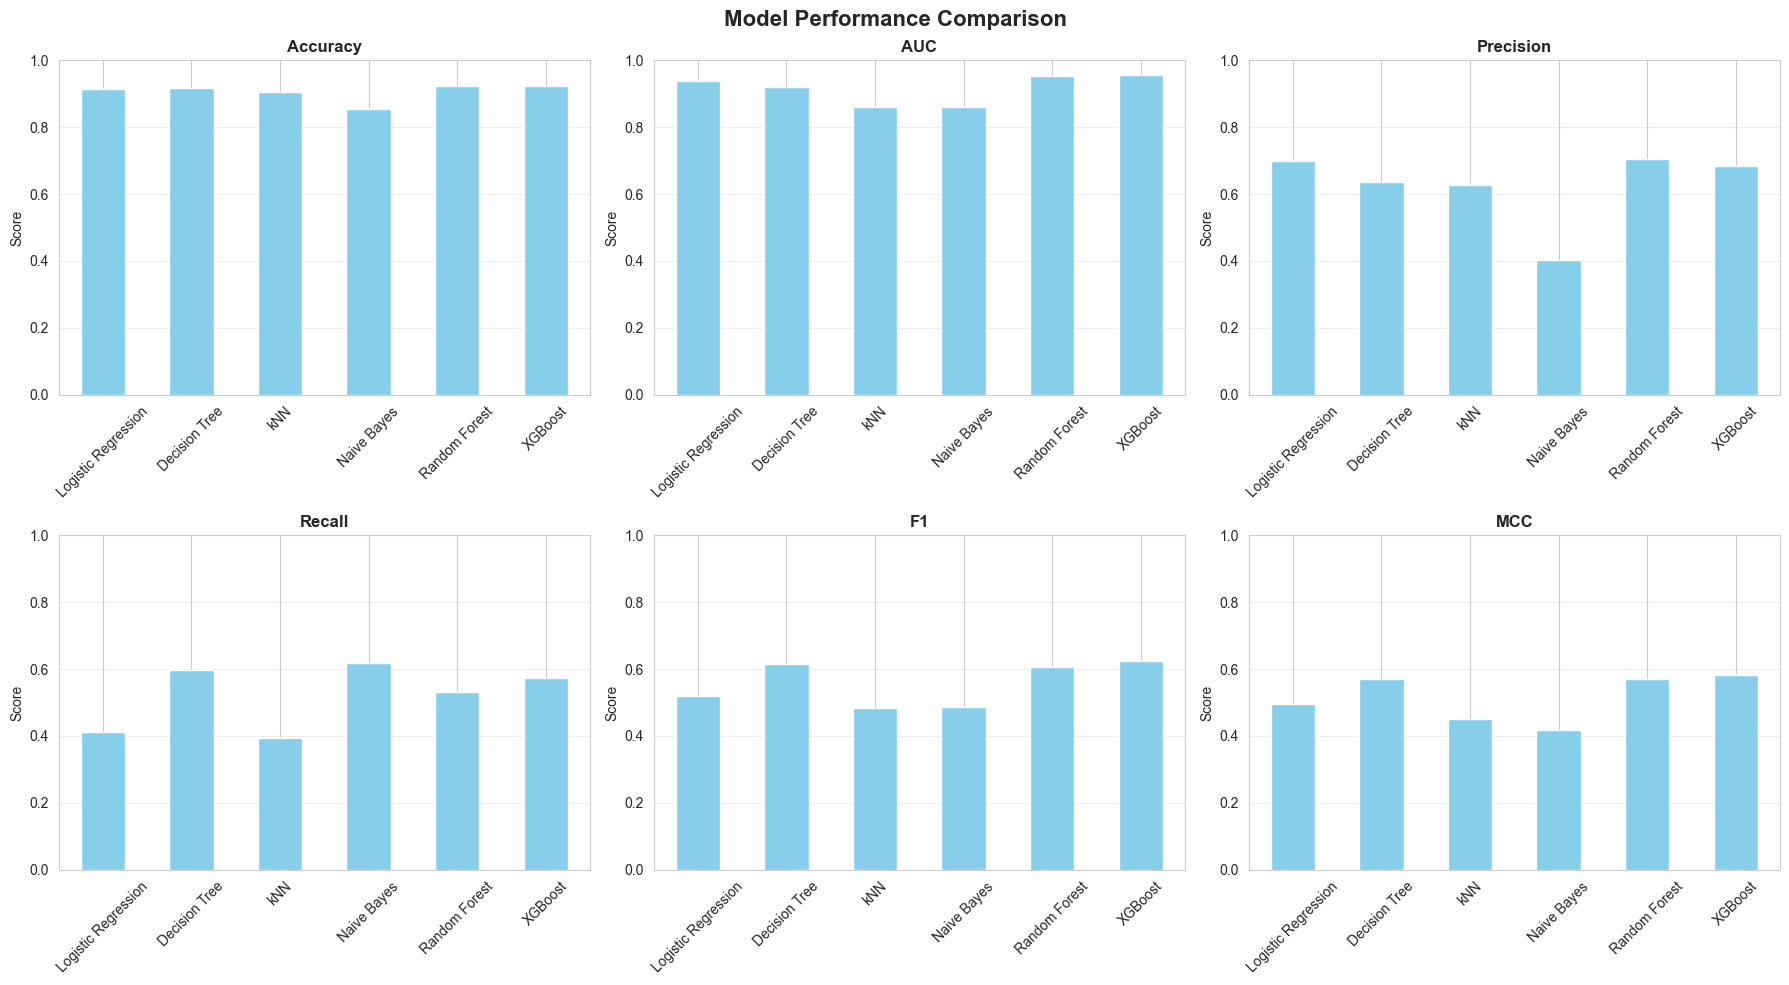

✅ Visualization saved!


In [13]:
# Performance comparison bar chart
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
axes = axes.ravel()

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color='skyblue')
    ax.set_title(metric, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Score')
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../model/performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved!")

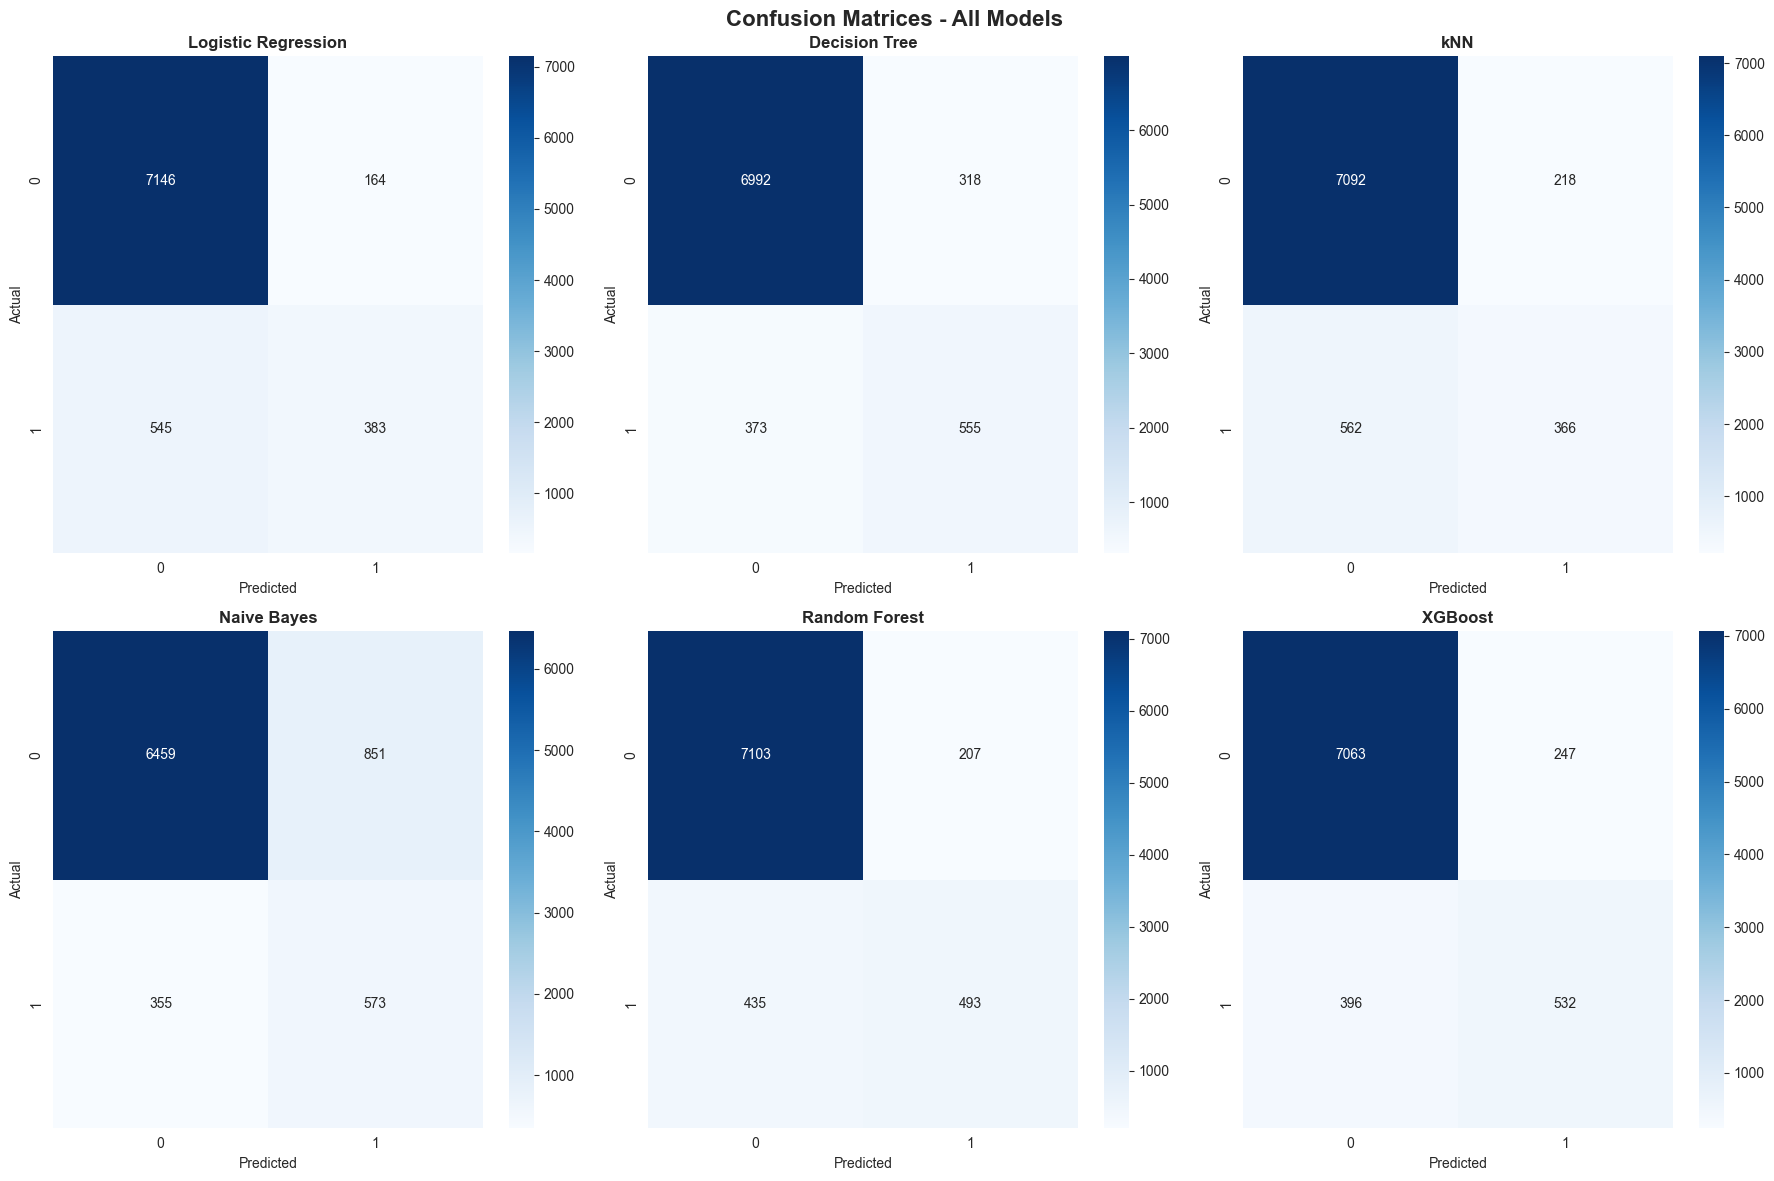

✅ Confusion matrices saved!


In [14]:
# Confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')

confusion_matrices = [
    (lr_cm, 'Logistic Regression'),
    (dt_cm, 'Decision Tree'),
    (knn_cm, 'kNN'),
    (nb_cm, 'Naive Bayes'),
    (rf_cm, 'Random Forest'),
    (xgb_cm, 'XGBoost')
]

axes = axes.ravel()
for idx, (cm, name) in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name, fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../model/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices saved!")

## Step 7: Summary and Best Model

In [15]:
# Find best model for each metric
print("\n" + "="*80)
print("  BEST PERFORMING MODELS BY METRIC")
print("="*80)

for metric in ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"{metric:12s}: {best_model:25s} ({best_score:.4f})")

# Overall best model (based on F1 score)
best_overall_idx = results_df['F1'].idxmax()
best_overall_model = results_df.loc[best_overall_idx, 'Model']
print(f"\n🏆 Best Overall Model (by F1 Score): {best_overall_model}")


  BEST PERFORMING MODELS BY METRIC
Accuracy    : Random Forest             (0.9221)
AUC         : XGBoost                   (0.9547)
Precision   : Random Forest             (0.7043)
Recall      : Naive Bayes               (0.6175)
F1          : XGBoost                   (0.6233)
MCC         : XGBoost                   (0.5829)

🏆 Best Overall Model (by F1 Score): XGBoost


## Summary

### ✅ Completed Tasks:
1. ✅ Implemented 6 classification models
2. ✅ Calculated all 6 required metrics for each model
3. ✅ Saved all trained models as pickle files
4. ✅ Created comparison table
5. ✅ Generated visualizations

### 📁 Saved Files:
- `model/logistic_regression.pkl`
- `model/decision_tree.pkl`
- `model/knn.pkl`
- `model/naive_bayes.pkl`
- `model/random_forest.pkl`
- `model/xgboost.pkl`
- `model/scaler.pkl`
- `model/model_comparison.csv`
- `model/performance_comparison.png`
- `model/confusion_matrices.png`

### 📝 Next Steps:
1. Update README.md with results from comparison table
2. Write observations for each model
3. Execute this notebook on BITS Virtual Lab
4. Take screenshot for submission
5. Create Streamlit app